In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
pd.set_option("display.max_columns",1000)
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style('whitegrid')
import os

# DATA READING

In [3]:
os.getcwd()

'C:\\Users\\anike'

In [4]:
os.chdir("C:/Users/anike/Desktop/python  project2")

In [5]:
data=pd.read_csv("Ecommerce - UK Retailer.csv",encoding="unicode_escape")

In [6]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
data.shape

(541909, 8)

In [8]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Problem Statements

## 1. Perform Basic EDA 

### a. Boxplot – All Numeric Variables 


<AxesSubplot:xlabel='Quantity'>

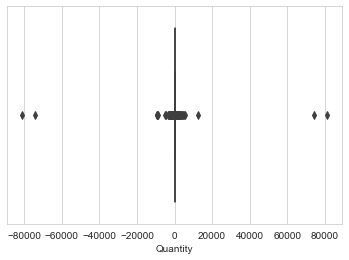

In [10]:
sns.boxplot(data['Quantity'])

<AxesSubplot:xlabel='UnitPrice'>

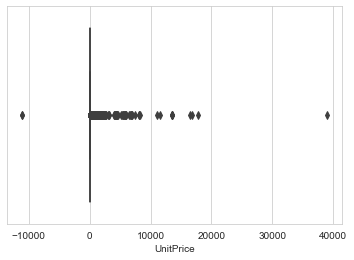

In [11]:
sns.boxplot(data['UnitPrice'])

<AxesSubplot:xlabel='CustomerID'>

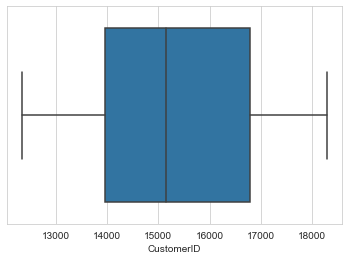

In [12]:
sns.boxplot(data['CustomerID'])

## b. Histogram – All Numeric Variables 


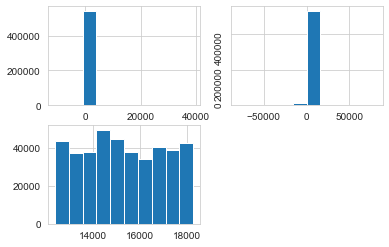

In [13]:
plt.subplot(2,2,1)
plt.hist(data["UnitPrice"])
plt.show;
plt.subplot(2,2,2)
plt.hist(data["Quantity"])
plt.yticks(rotation=90)
plt.show;
plt.subplot(2,2,3)
plt.hist(data["CustomerID"])
plt.show;


### c. Distribution Plot – All Numeric Variables

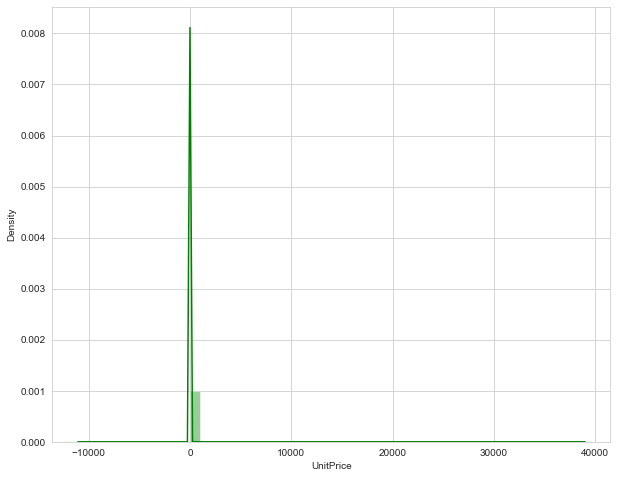

In [14]:
plt.figure(figsize=(10,8))
sns.distplot(data['UnitPrice'],color='g')
plt.show()

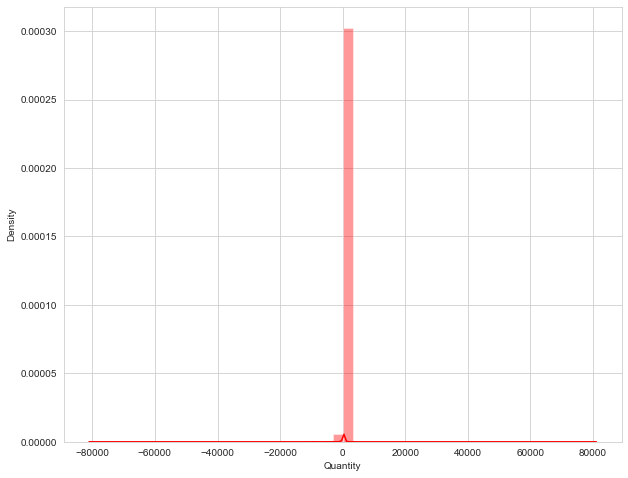

In [15]:
plt.figure(figsize=(10,8))
sns.distplot(data['Quantity'],color='r')
plt.show()

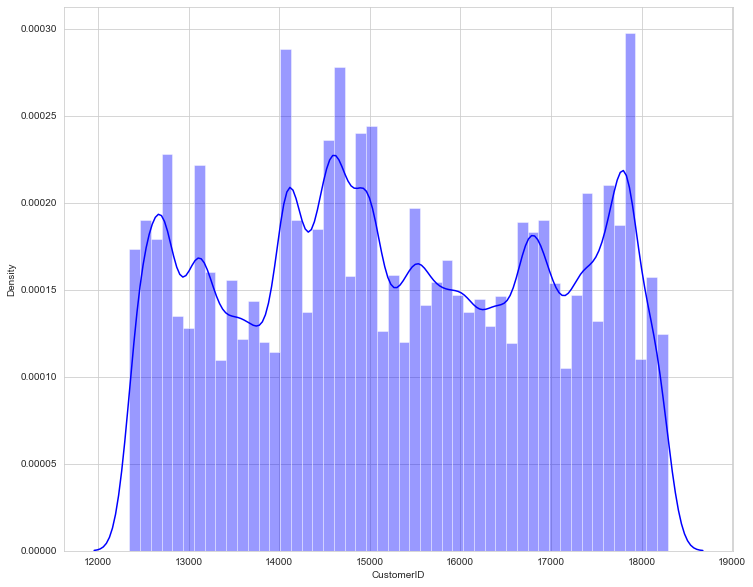

In [16]:
plt.figure(figsize=(12,10))
sns.distplot(data['CustomerID'],color='b')
plt.show()


### d. Aggregation for all numerical Columns 



In [17]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [18]:
x=data[["UnitPrice","Quantity","CustomerID"]]

In [19]:
x.head()

,UnitPrice,Quantity,CustomerID
0,2.55,6,17850.0
1,3.39,6,17850.0
2,2.75,8,17850.0
3,3.39,6,17850.0
4,3.39,6,17850.0


In [20]:
x.sum()

UnitPrice     2.498804e+06
Quantity      5.176450e+06
CustomerID    6.219476e+09
dtype: float64

In [21]:
x.mean()

UnitPrice         4.611114
Quantity          9.552250
CustomerID    15287.690570
dtype: float64

In [22]:
x.median()

UnitPrice         2.08
Quantity          3.00
CustomerID    15152.00
dtype: float64

In [23]:
x.std()

UnitPrice       96.759853
Quantity       218.081158
CustomerID    1713.600303
dtype: float64

In [24]:
x.max()

UnitPrice     38970.0
Quantity      80995.0
CustomerID    18287.0
dtype: float64

In [25]:
x.min()

UnitPrice    -11062.06
Quantity     -80995.00
CustomerID    12346.00
dtype: float64

### e. Unique Values across all columns 

In [26]:
for col in data:
    print(data[col].unique())

['536365' '536366' '536367' ... '581585' '581586' '581587']
['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1400     39    -48    -50     26   1440
     31     82     78     97     98     35     57    -20    110    -2

In [27]:
data.count(axis=0)

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [28]:
data.nunique(axis=0)

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

### f. Duplicate values across all columns

In [29]:
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


### g. Correlation – Heatmap - All Numeric Variables 

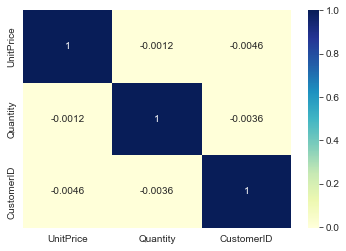

In [30]:
dataplot = sns.heatmap(x.corr(), cmap="YlGnBu", annot=True)
plt.show()

### h. Regression Plot - All Numeric Variables 

In [31]:
X = data['UnitPrice']
Y = data['Quantity']
Z = data['CustomerID']

<AxesSubplot:xlabel='UnitPrice', ylabel='CustomerID'>

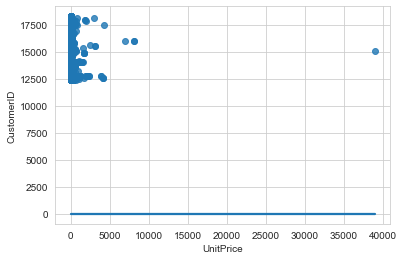

In [32]:
sns.regplot(x=X,y=Z, data=data, logistic=True, ci=None)

<AxesSubplot:xlabel='Quantity', ylabel='CustomerID'>

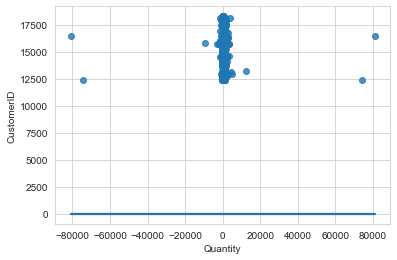

In [33]:
sns.regplot(x=Y,y=Z, data=x, logistic=True, ci=None)

### i. Bar Plot – Every Categorical Variable vs every Numerical Variable 

<AxesSubplot:xlabel='Country', ylabel='UnitPrice'>

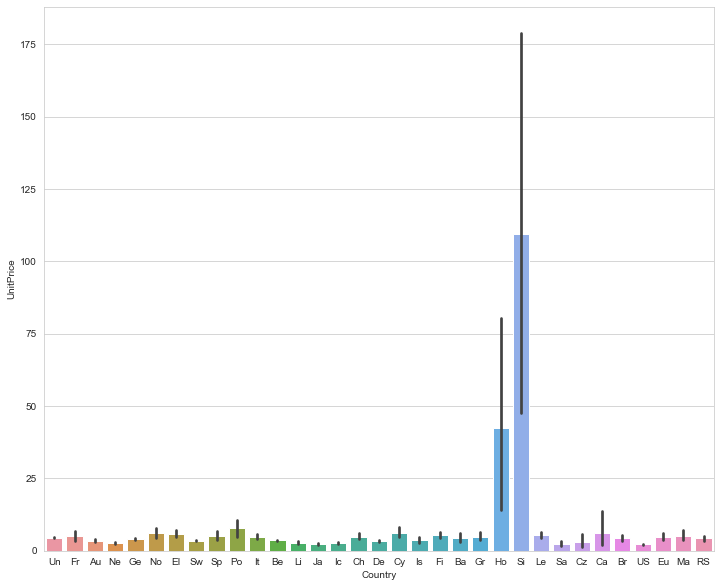

In [34]:
plt.figure(figsize=(12,10))
sns.barplot(x=data['Country'].str[:2],y=data['UnitPrice'])


<AxesSubplot:xlabel='Country', ylabel='Quantity'>

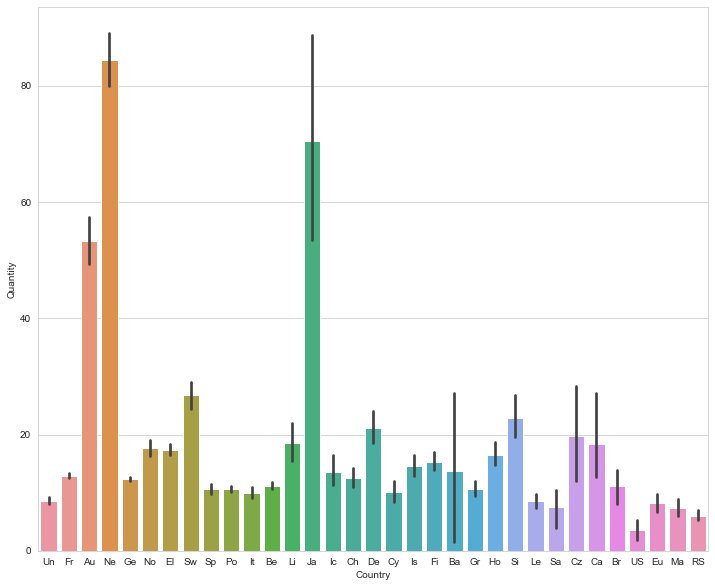

In [35]:
plt.figure(figsize=(12,10))
sns.barplot(x=data['Country'].str[:2],y=data['Quantity'])


<AxesSubplot:xlabel='Country', ylabel='UnitPrice'>

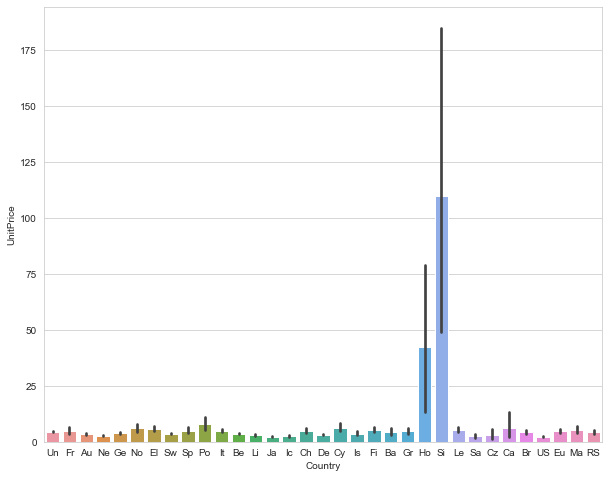

In [36]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['Country'].str[:2],y=data['UnitPrice'])


<AxesSubplot:xlabel='Country', ylabel='CustomerID'>

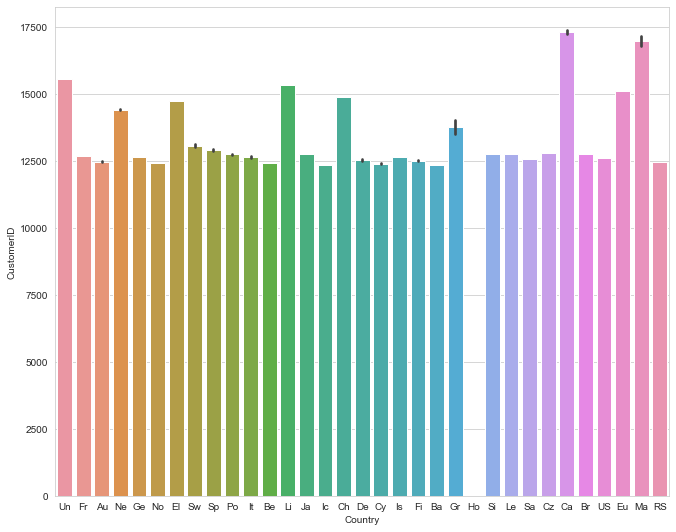

In [37]:
plt.figure(figsize=(11,9))
sns.barplot(x=data['Country'].str[:2],y=data['CustomerID'])


### j. Plot the skewness - All Numeric Variables

In [ ]:
data['Skewed Data'] = pd.DataFrame(data.skew(axis=1,skipna=True))

In [ ]:
sns.histplot(data['Skewed Data'],bins=10);

In [ ]:
sns.distplot(data['Skewed Data'].head(), bins=10)

# 2. Check for missing values in all columns and replace them with the appropriate metric 
(Mean/Median/Mode) 

In [ ]:
data.isnull().sum().sort_values(ascending=False)

In [ ]:
x=data["CustomerID"].mean()
type(x)

In [ ]:
int(x)

In [ ]:
data['CustomerID']=data["CustomerID"].fillna(x)

In [45]:
data.dropna(inplace=True)

In [46]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Skewed Data    0
dtype: int64

# 3. Remove duplicate rows

In [47]:
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Skewed Data
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom,1.732051
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom,1.732051
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom,1.732051
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom,1.732051
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom,1.732051
...,...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom,1.732051
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom,1.732051
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom,1.732051
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom,1.732051


In [48]:
data=data.drop_duplicates(keep=False)

In [49]:
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Skewed Data


### Now there are no Duplicate in this data

In [50]:
data.shape

(396767, 9)

# 4. Remove rows which have negative values in Quantity column

In [51]:
(data["Quantity"]<0).sum()

8844

In [52]:
data.drop(data[data["Quantity"]<0].index,inplace=True)

In [53]:
data.shape

(387923, 9)

# 5. Add the columns - Month, Day and Hour for the invoice

In [ ]:
data.head()

In [ ]:
import datetime as dt

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data.InvoiceDate, format='%m/%d/%Y %H:%M')

In [ ]:
data.head()

In [ ]:
data.insert(loc=2, column='Year_month', value=data['InvoiceDate'].map(lambda x: 100*x.year + x.month))
data.insert(loc=3, column='Month', value=data.InvoiceDate.dt.month)

data.insert(loc=4, column='Day', value=(data.InvoiceDate.dt.dayofweek)+1)
data.insert(loc=5, column='Hour', value=data.InvoiceDate.dt.hour)
data.insert(loc=6, column='Minute', value=data.InvoiceDate.dt.minute)

In [ ]:
data.head()

# 6. How many orders made by the customers?

In [ ]:
data.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head()

In [ ]:
orders = data.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(10,8))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

# 7. TOP 5 customers with higher number of orders

In [ ]:
orders.sort_values(by='InvoiceNo', ascending=False).head()

# 8. How much money spent by the customers?

In [ ]:
data['Amount_Spent'] = data['Quantity'] * data['UnitPrice']

In [ ]:
money_spent = data.groupby(by=['CustomerID','Country'], as_index=False)['Amount_Spent'].sum()

plt.subplots(figsize=(11,8))
plt.plot(money_spent.CustomerID, money_spent.Amount_Spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent In(Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [ ]:
data.head()

# 9. TOP 5 customers with highest money spent

In [ ]:
money_spent.sort_values(by='Amount_Spent', ascending=False).head()

# 10. How many orders per month?

In [ ]:
ax = data.groupby('InvoiceNo')['Year_month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

In [ ]:
ax = data.groupby('InvoiceNo')['Year_month'].unique().value_counts().sort_index()
data.info()

# 11. How many orders per day?

In [ ]:
ax = data.groupby('InvoiceNo')['Day'].value_counts()
ax

In [ ]:
ax = data.groupby('InvoiceNo')['Day'].unique().value_counts()
#.value_counts().sort_index()

In [ ]:
ax = data.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

# 12. How many orders per hour?

In [ ]:
a=data['Hour'].value_counts().sort_index()

In [ ]:
ax= data.groupby('InvoiceNo')['Hour'].unique().value_counts()

In [ ]:
ax= data.groupby('InvoiceNo')["Hour"].unique().value_counts().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,22), rotation='horizontal', fontsize=15)
plt.show()

# 13. How many orders for each country?

In [ ]:
group_country_orders = data.groupby('Country')['InvoiceNo'].count().sort_values()
group_country_orders

In [ ]:
group_country_orders = data.groupby('Country')['InvoiceNo'].count().sort_values()

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

In [ ]:
group_country_orders = data.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']
# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

# 14. Orders trend across months`

In [ ]:
data.Year_month.value_counts().sort_index()

In [ ]:
ax = data.groupby('InvoiceNo')['Year_month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

# 15. How much money spent by each country?

In [ ]:
group_country_amount_spent = data.groupby('Country')['Amount_Spent'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()